In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from causallearn.search.ConstraintBased.PC import pc
from scipy.stats import ks_2samp

import functions

In [3]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH']
low_scatter_para.append('M_BH_std')

In [4]:
df_full = pd.read_csv('SMBH_Data_0911.csv',header=1)
df_low_scatter = df_full[low_scatter_para].dropna(axis='index',how='any')
len(df_low_scatter)

100

Training Set RMSE:  0.17292621620217022
Test Set RMSE:  0.33713413650949187


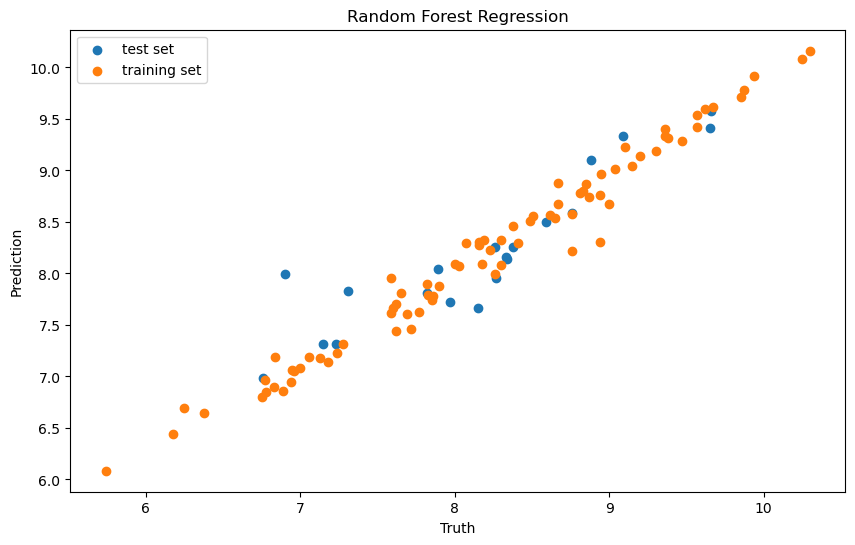

In [5]:
# randomly split the data into training and testing sets
df_train, df_test = train_test_split(df_low_scatter, test_size=0.2, random_state=0)

keys = low_scatter_para.copy()
keys.remove('M_BH')
keys.remove('M_BH_std')

X_train = df_train[keys]
y_train = df_train['M_BH']
X_test = df_test[keys]
y_test = df_test['M_BH']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

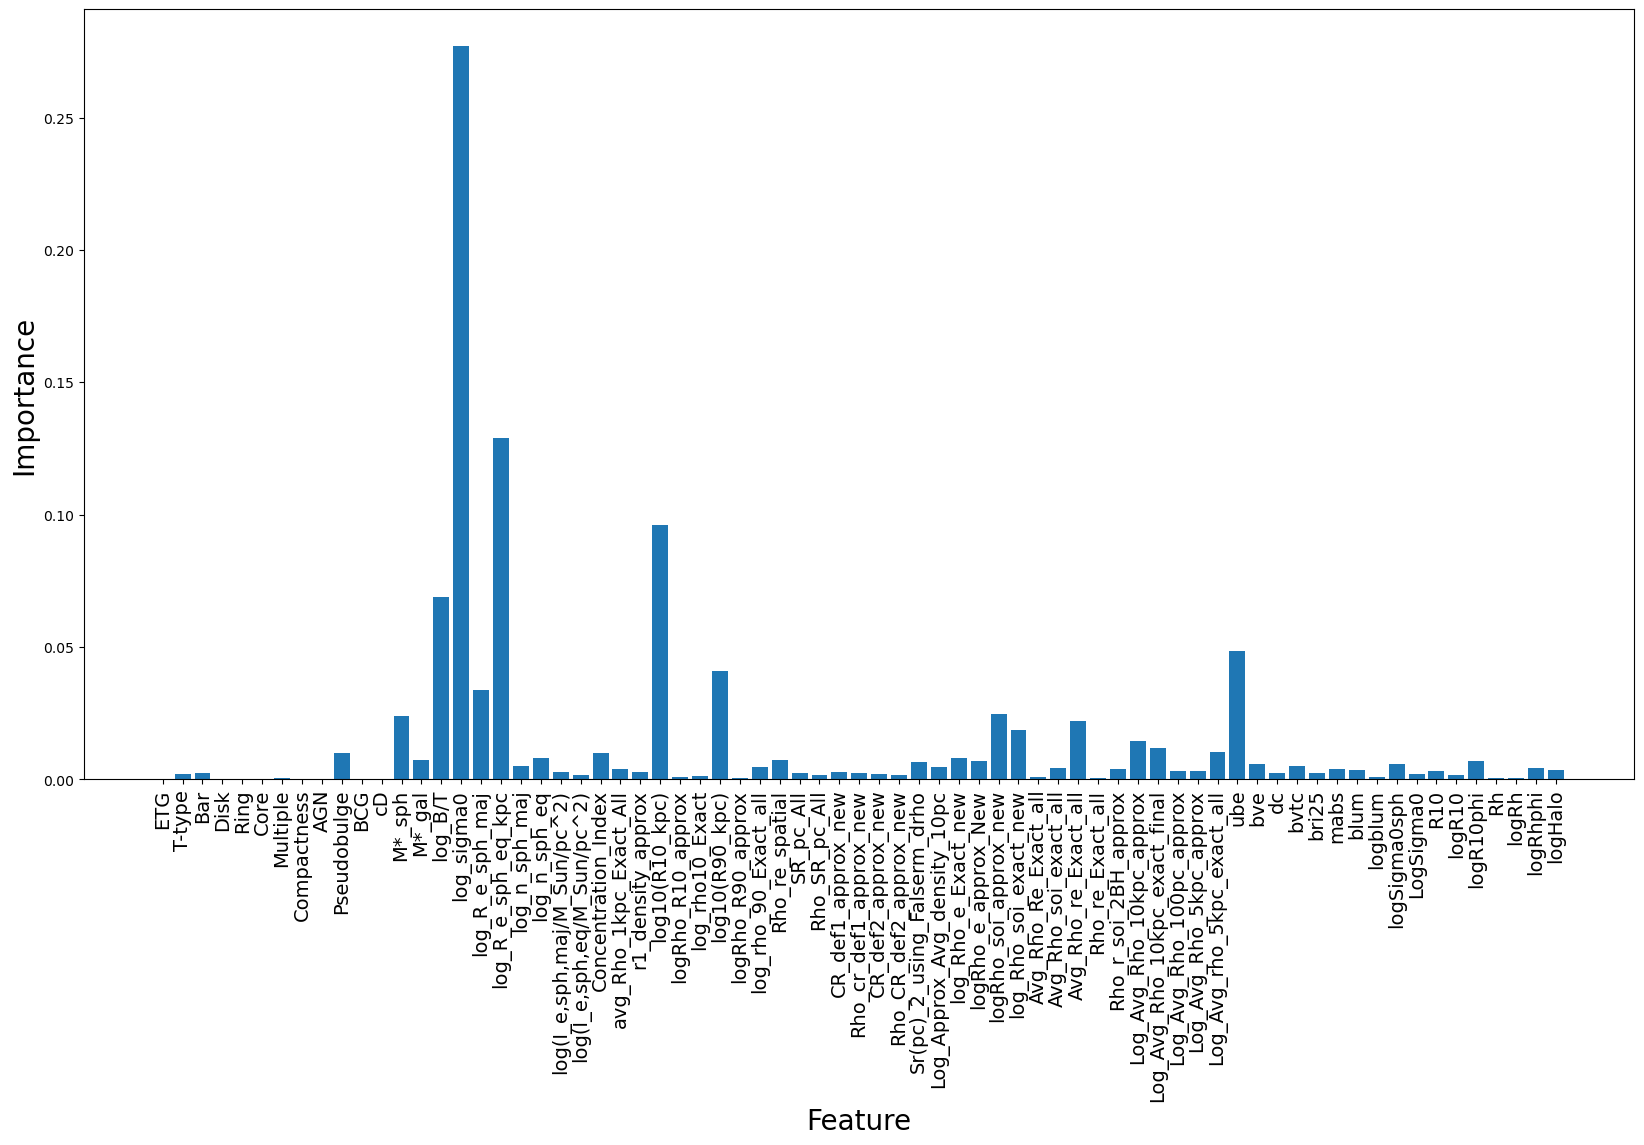

In [9]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X_train.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X_train.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [10]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X_train.columns[importance_order[i]],importance[i])

1 log_sigma0 0.27701477734950775
2 log_R_e_sph_eq_kpc 0.12881458819408206
3 log10(R10_kpc) 0.09594371640678424
4 log_B/T 0.06873542787588427
5 ube 0.048332632658789086
6 log10(R90_kpc) 0.041006040144150956
7 log_R_e_sph_maj 0.033819147096210304
8 logRho_soi_approx_new 0.024618726544306586
9 M*_sph 0.023894521732413767
10 Avg_Rho_re_Exact_all 0.02185342170184103
11 log_Rho_soi_exact_new 0.01858988476319111
12 Log_Avg_Rho_10kpc_approx 0.014456302914871015
13 Log_Avg_Rho_10kpc_exact_final 0.011698466611258342
14 Log_Avg_rho_5kpc_exact_all 0.010167957877098517
15 Pseudobulge 0.010140856879579037
16 Concentration_Index 0.010139432389320026
17 log_n_sph_eq 0.008199276348584892
18 log_Rho_e_Exact_new 0.007949511932657223
19 Rho_re_spatial 0.0072658861265935
20 M*_gal 0.007234734324552365
21 logR10phi 0.00704196949288134
22 logRho_e_approx_New 0.006808397242103216
23 Sr(pc)_2_using_Falserm_drho 0.006681412546723949
24 logSigma0sph 0.005901000775785453
25 bve 0.005736299356348372
26 log_n_sph_m

In [11]:
X_train.columns[importance_order][:10]

Index(['log_sigma0', 'log_R_e_sph_eq_kpc', 'log10(R10_kpc)', 'log_B/T', 'ube',
       'log10(R90_kpc)', 'log_R_e_sph_maj', 'logRho_soi_approx_new', 'M*_sph',
       'Avg_Rho_re_Exact_all'],
      dtype='object')

In [12]:
top_ten=np.array(X_train.columns[importance_order][:10]).tolist()
#top_ten=['log_sigma0','log_B/T','logRho_soi_approx_new']

In [97]:
model=functions.test_relation(top_ten.copy(),obs=df_train,return_model=True,maxsize=10,ncyclesperiteration=5000,niterations=500)

80


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_eq_kpc
x 2 : log10(R10_kpc)
x 3 : log_B/T
x 4 : ube
x 5 : log10(R90_kpc)
x 6 : log_R_e_sph_maj
x 7 : logRho_soi_approx_new
x 8 : M*_sph
x 9 : Avg_Rho_re_Exact_all
Eq. selected rmse: 0.24683719754464895


4.219874827759928*x0 - 0.49009992868677227*x7

Eq. 0 rmse: 0.9526468090252326


8.27523523107080

Eq. 1 rmse: 0.37069320220396496


x8 - 2.3265036887634407

Eq. 2 rmse: 0.32386121481677604


x0 + x8 - 4.588906768395975

Eq. 3 rmse: 0.24683719754464895


4.219874827759928*x0 - 0.49009992868677227*x7

Eq. 4 rmse: 0.2438058472357689


0.45911530816725965*x4 - 0.45911530816725965*x7 + 0.875952769139907*x8

Eq. 5 rmse: 0.22421839503311056


2.5224127021772498*x0 + x3 - 0.4783552506329677*x7 + 4.223905568683828

In [98]:
y = df_test['M_BH'].to_numpy()
w = 1/df_test['M_BH_std'].to_numpy()**2

for i in range(len(model.equations_)):
    y_pred = model.predict(X_test[top_ten].to_numpy(),index=i)    
    print('Eq.',i,'test set rmse:',functions.wrmse(y,y_pred,w))
    display(model.sympy(index=i))

Eq. 0 test set rmse: 0.6636673411505579


8.27523523107080

Eq. 1 test set rmse: 0.42456854043502723


x8 - 2.3265036887634407

Eq. 2 test set rmse: 0.3677214264166477


x0 + x8 - 4.588906768395975

Eq. 3 test set rmse: 0.40107353994652406


4.219874827759928*x0 - 0.49009992868677227*x7

Eq. 4 test set rmse: 0.32758457350904113


0.45911530816725965*x4 - 0.45911530816725965*x7 + 0.875952769139907*x8

Eq. 5 test set rmse: 0.2707984353468823


2.5224127021772498*x0 + x3 - 0.4783552506329677*x7 + 4.223905568683828

In [13]:
model=functions.test_relation(top_ten.copy(),obs=df_train,return_model=True,maxsize=15,ncyclesperiteration=5000,niterations=1000)

80


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_eq_kpc
x 2 : log10(R10_kpc)
x 3 : log_B/T
x 4 : ube
x 5 : log10(R90_kpc)
x 6 : log_R_e_sph_maj
x 7 : logRho_soi_approx_new
x 8 : M*_sph
x 9 : Avg_Rho_re_Exact_all
Eq. selected rmse: 0.21366412273440533


-x2 + x8 - 2.143877701441247 + (x5 - x7)/x0

Eq. 0 rmse: 0.9526468090252327


8.275235230742542

Eq. 1 rmse: 0.37069320220396496


x8 - 2.3265036886073487

Eq. 2 rmse: 0.3238612148167761


x0 + x8 - 4.588906772446221

Eq. 3 rmse: 0.2502767819102766


0.8773175508279831*x8 - 0.8773175508279831*x7/x0

Eq. 4 rmse: 0.23264727150259823


0.22332730789870905*x0*(-x7 + x8) + 4.191312475517191

Eq. 5 rmse: 0.21366412273440533


-x2 + x8 - 2.143877701441247 + (x5 - x7)/x0

Eq. 6 rmse: 0.20893144421728704


0.18747794995246814*x0*(-x2 + x5 - x7 + x8) + 4.191312475517191

Eq. 7 rmse: 0.2023024779659757


-1.2624337739606468*x2 + x8 - 2.143877701441247 + 1.191381354776745*(x5 - x7)/x0

In [15]:
y = df_test['M_BH'].to_numpy()
w = 1/df_test['M_BH_std'].to_numpy()**2

for i in range(len(model.equations_)):
    y_pred = model.predict(X_test[top_ten].to_numpy(),index=i)    
    print('Eq.',i,'test set rmse:',functions.wrmse(y,y_pred,w))
    display(model.sympy(index=i))

Eq. 0 test set rmse: 0.6636673410324221


8.275235230742542

Eq. 1 test set rmse: 0.42456854053953824


x8 - 2.3265036886073487

Eq. 2 test set rmse: 0.3677214238268871


x0 + x8 - 4.588906772446221

Eq. 3 test set rmse: 0.328147828252743


0.8773175508279831*x8 - 0.8773175508279831*x7/x0

Eq. 4 test set rmse: 0.33284984113024485


0.22332730789870905*x0*(-x7 + x8) + 4.191312475517191

Eq. 5 test set rmse: 0.25939025770129426


-x2 + x8 - 2.143877701441247 + (x5 - x7)/x0

Eq. 6 test set rmse: 0.19222932734994294


0.18747794995246814*x0*(-x2 + x5 - x7 + x8) + 4.191312475517191

Eq. 7 test set rmse: 0.2394710173675649


-1.2624337739606468*x2 + x8 - 2.143877701441247 + 1.191381354776745*(x5 - x7)/x0

In [16]:
# model = PySRRegressor.from_file('hall_of_fame_2023-09-21_134949.374.csv')

Checking if hall_of_fame_2023-09-21_134949.374.pkl exists...
Loading model from hall_of_fame_2023-09-21_134949.374.pkl


In [88]:
model=functions.test_relation(top_ten.copy(),obs=df_train,return_model=True,maxsize=10,niterations=50)

80


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : logRho_soi_approx_new
Eq. selected rmse: 0.2468371975446489


4.219874828741335*x0 - 0.4900999276201195*x2

Eq. 0 rmse: 0.9526468090252326


8.275235230740721

Eq. 1 rmse: 0.4557559511974226


3.66607176721283*x0

Eq. 2 rmse: 0.3561589671972557


3.8384438900768414*x0 + x1

Eq. 3 rmse: 0.2468371975446489


4.219874828741335*x0 - 0.4900999276201195*x2

Eq. 4 rmse: 0.2463118556058467


4.111313657866108*x0 - 0.5097333235859528*x2 + 0.2974641405267519

Eq. 5 rmse: 0.2242183950331104


2.5224127034968626*x0 + x1 - 0.478355247571191*x2 + 4.22390555765285

In [89]:
y = df_test['M_BH'].to_numpy()
w = 1/df_test['M_BH_std'].to_numpy()**2

for i in range(len(model.equations_)):
    y_pred = model.predict(X_test[top_ten].to_numpy(),index=i)    
    print('Eq.',i,'test set rmse:',functions.wrmse(y,y_pred,w))
    display(model.sympy(index=i))

Eq. 0 test set rmse: 0.6636673410317668


8.275235230740721

Eq. 1 test set rmse: 0.34197282477639157


3.66607176721283*x0

Eq. 2 test set rmse: 0.3310501516394228


3.8384438900768414*x0 + x1

Eq. 3 test set rmse: 0.4010735367531391


4.219874828741335*x0 - 0.4900999276201195*x2

Eq. 4 test set rmse: 0.4076055582067915


4.111313657866108*x0 - 0.5097333235859528*x2 + 0.2974641405267519

Eq. 5 test set rmse: 0.270798434483378


2.5224127034968626*x0 + x1 - 0.478355247571191*x2 + 4.22390555765285

In [4]:
easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'Pseudobulge','logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','AGN','Multiple','log_n_sph_maj','logR10','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','M_BH','log10(R10_kpc)','log10(R90_kpc)']
easy_obs_para.append('M_BH_std')

In [5]:
df_full = pd.read_csv('SMBH_Data_0911.csv',header=1)
df_easy_obs = df_full[easy_obs_para].dropna(axis='index',how='any')
len(df_easy_obs)

100

Training Set RMSE:  0.18004820569780672
Test Set RMSE:  0.33645664802467534


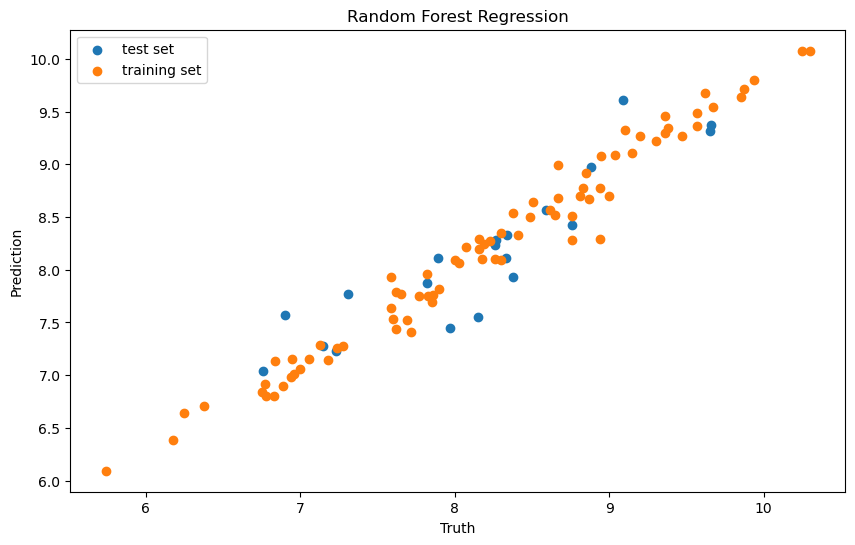

In [5]:
# randomly split the data into training and testing sets
df_train, df_test = train_test_split(df_easy_obs, test_size=0.2, random_state=0)

keys = easy_obs_para.copy()
keys.remove('M_BH')
keys.remove('M_BH_std')

X_train = df_train[keys]
y_train = df_train['M_BH']
X_test = df_test[keys]
y_test = df_test['M_BH']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

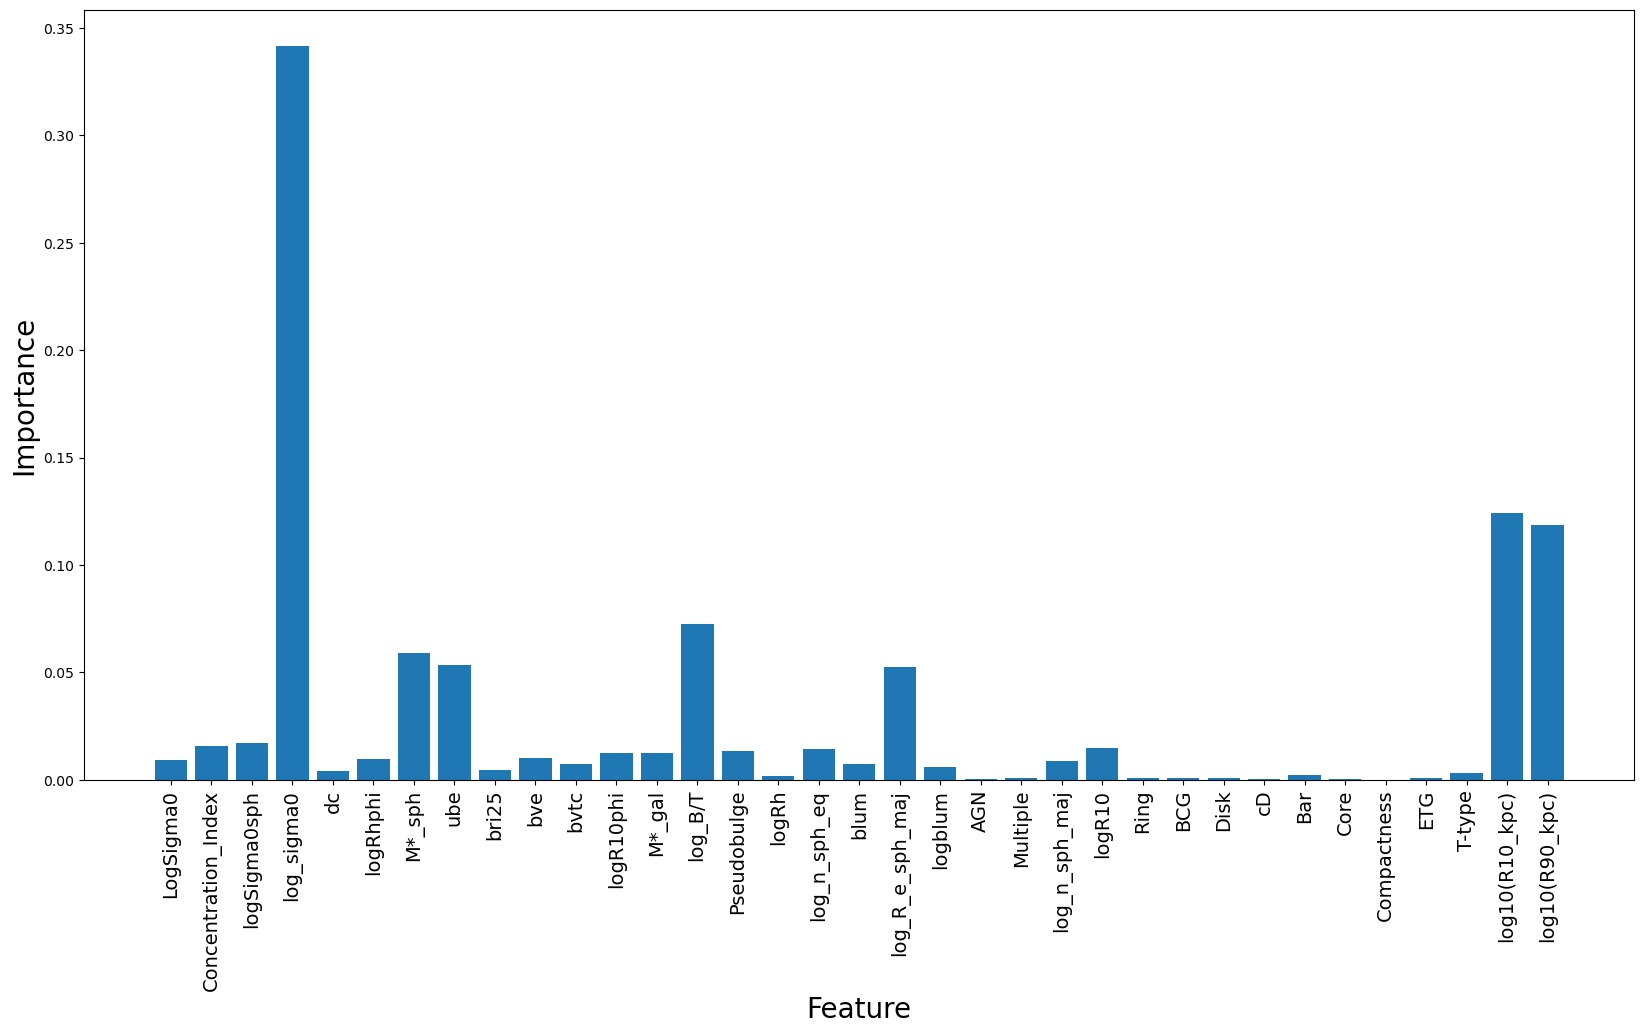

In [6]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X_train.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X_train.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [8]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X_train.columns[importance_order[i]],importance[i])

1 log_sigma0 0.3415633035116016
2 log10(R10_kpc) 0.12405367394318464
3 log10(R90_kpc) 0.11843661333623273
4 log_B/T 0.07254191381102593
5 M*_sph 0.0589241804311294
6 ube 0.05332570304334881
7 log_R_e_sph_maj 0.05248628050375123
8 logSigma0sph 0.016996730792024805
9 Concentration_Index 0.01563334044114019
10 logR10 0.014823374791187902
11 log_n_sph_eq 0.014392402439200348
12 Pseudobulge 0.013477732828030905
13 logR10phi 0.012431083756883966
14 M*_gal 0.012418056028564895
15 bve 0.010272425408476976
16 logRhphi 0.009751479042530126
17 LogSigma0 0.009250554023488773
18 log_n_sph_maj 0.008429167774010234
19 blum 0.007455759079547089
20 bvtc 0.007360704183760941
21 logblum 0.005960217943637611
22 bri25 0.004415160025313819
23 dc 0.004013908823429739
24 T-type 0.0030905986421541263
25 Bar 0.0023097147223042178
26 logRh 0.0017562159492832028
27 Multiple 0.0008181161613286333
28 Ring 0.0008154514678853243
29 BCG 0.000703258397504895
30 Disk 0.0006034682921290025
31 ETG 0.0005279963341336611
32

In [9]:
top_ten=np.array(X_train.columns[importance_order][:10]).tolist()

In [10]:
model=functions.test_relation(top_ten.copy(),obs=df_train,return_model=True,maxsize=15,ncyclesperiteration=5000,niterations=500)
# model=functions.test_relation(top_ten.copy(),obs=df_train,return_model=True)

80


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log10(R10_kpc)
x 2 : log10(R90_kpc)
x 3 : log_B/T
x 4 : M*_sph
x 5 : ube
x 6 : log_R_e_sph_maj
x 7 : logSigma0sph
x 8 : Concentration_Index
x 9 : logR10
Eq. selected rmse: 0.3238612148167761


x0 + x4 - 4.588906768395801

Eq. 0 rmse: 0.9526468090252326


8.275235230740355

Eq. 1 rmse: 0.37069320220396496


x4 - 2.3265036887115143

Eq. 2 rmse: 0.3238612148167761


x0 + x4 - 4.588906768395801

Eq. 3 rmse: 0.315388659306185


x0 + x4 - x8 - 4.219620078699854

Eq. 4 rmse: 0.30628206987989853


x2*(0.684636014616605 - x8) + x4 - 2.579507014833625

Eq. 5 rmse: 0.2889581903197974


x4 + 0.2457807030867558*x6/x8 - x9 - 1.2406312366250134

Eq. 6 rmse: 0.272446706644639


x4 + x6*(-x8 + 0.3832838816814756/x8) - x9 - 1.2406312366250134

In [11]:
y = df_test['M_BH'].to_numpy()
w = 1/df_test['M_BH_std'].to_numpy()**2

for i in range(len(model.equations_)):
    y_pred = model.predict(X_test[top_ten].to_numpy(),index=i)    
    print('Eq.',i,'test set rmse:',functions.wrmse(y,y_pred,w))
    display(model.sympy(index=i))

Eq. 0 test set rmse: 0.663667341031635


8.275235230740355

Eq. 1 test set rmse: 0.4245685404697945


x4 - 2.3265036887115143

Eq. 2 test set rmse: 0.367721426416759


x0 + x4 - 4.588906768395801

Eq. 3 test set rmse: 0.395192644366045


x0 + x4 - x8 - 4.219620078699854

Eq. 4 test set rmse: 0.40433812967562693


x2*(0.684636014616605 - x8) + x4 - 2.579507014833625

Eq. 5 test set rmse: 0.5061103372189651


x4 + 0.2457807030867558*x6/x8 - x9 - 1.2406312366250134

Eq. 6 test set rmse: 0.40715584518621994


x4 + x6*(-x8 + 0.3832838816814756/x8) - x9 - 1.2406312366250134

In [14]:
# show some statstics of y_test
y_test.describe()

count    20.000000
mean      8.169500
std       0.824241
min       6.760000
25%       7.692500
50%       8.265000
75%       8.632500
max       9.660000
Name: M_BH, dtype: float64

In [15]:
# show some statstics of y_train
y_train.describe()

count    80.000000
mean      8.203125
std       1.035822
min       5.740000
25%       7.590000
50%       8.210000
75%       8.942500
max      10.300000
Name: M_BH, dtype: float64

In [17]:
df_easy_obs['M_BH'].describe()

count    100.000000
mean       8.196400
std        0.993349
min        5.740000
25%        7.590000
50%        8.245000
75%        8.895000
max       10.300000
Name: M_BH, dtype: float64

In [18]:
y_test.describe()

count    20.000000
mean      8.169500
std       0.824241
min       6.760000
25%       7.692500
50%       8.265000
75%       8.632500
max       9.660000
Name: M_BH, dtype: float64

In [19]:
# perform a Kolmogorov–Smirnov(K–S)test on y_test and y_train
from scipy.stats import ks_2samp
ks_2samp(y_test,y_train)

KstestResult(statistic=0.15, pvalue=0.8377869859010044, statistic_location=8.59, statistic_sign=1)

In [20]:
ks_2samp(y_test,df_easy_obs['M_BH'])

KstestResult(statistic=0.12, pvalue=0.9569602151105132, statistic_location=8.59, statistic_sign=1)

In [22]:
ks_2samp(y_train,df_easy_obs['M_BH'])

KstestResult(statistic=0.03, pvalue=0.9999999999129023, statistic_location=8.59, statistic_sign=-1)

In [13]:
# randonly split the data into training and testing sets until the K-S test is passed
stop=False
shreshold=0.99
while stop == False:
    df_train, df_test = train_test_split(df_easy_obs, test_size=0.2)
    y_train = df_train['M_BH']
    y_test = df_test['M_BH']
    ks_test=ks_2samp(y_test,df_easy_obs['M_BH'])
    ks_train=ks_2samp(y_train,df_easy_obs['M_BH'])
    ks=ks_2samp(y_test,y_train)
    print(ks_test[1],ks_train[1],ks[1])

    if ks_test[1] > shreshold and ks_train[1] > shreshold and ks[1] > shreshold:
        stop = True
        print('K-S test passed!')
    else:
        print('K-S test failed!')


0.8159724060276419 0.9999995840826245 0.5926756953587349
K-S test failed!
0.9983764372940703 1.0 0.9809125565278748
K-S test failed!
0.9212667120312683 0.9999999969181539 0.7606856950138432
K-S test failed!
0.9212667120312683 0.9999999969181539 0.7606856950138432
K-S test failed!
0.9212667120312683 0.9999999969181539 0.7606856950138432
K-S test failed!
0.6141969660268306 0.9999506430173455 0.3631416882390347
K-S test failed!
0.9569602151105132 0.9999999999129023 0.8377869859010044
K-S test failed!
0.36236777231536565 0.9982115913266196 0.15944990226013403
K-S test failed!
0.6141969660268306 0.9999506430173455 0.3631416882390347
K-S test failed!
0.8735660907734264 0.9999999552059721 0.6775439365140626
K-S test failed!
0.12895877435753167 0.9707041483799443 0.033296970230896034
K-S test failed!
0.8735660907734264 0.9999999552059721 0.6775439365140626
K-S test failed!
0.9569602151105132 0.9999999999129023 0.8377869859010044
K-S test failed!
0.4189859473338171 0.9991189007186937 0.19917215

In [14]:
y_test.describe()

count    20.000000
mean      8.150000
std       0.979543
min       5.740000
25%       7.612500
50%       8.215000
75%       8.880000
max       9.660000
Name: M_BH, dtype: float64

In [15]:
y_train.describe()

count    80.000000
mean      8.208000
std       1.002548
min       6.180000
25%       7.512500
50%       8.245000
75%       8.895000
max      10.300000
Name: M_BH, dtype: float64